#### Sprint 1 (Task 1 and Task 2)

In [2]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 

In [3]:
df=pd.read_csv('final_amazon_electronics.csv')
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,I was very surprised at the high quality of th...,2015-08-31,1
1,US,30088427,RQ28TSA020Y6J,B013ALA9LA,671157305,TP-Link OnHub AC1900 Wireless Wi-Fi Router,PC,5,24,31,N,N,OnHub is a pretty no nonsense type router that...,I am a Google employee and had to chance to us...,2015-08-31,1
2,US,38264512,R39NJY2YJ1JFSV,B00AQMTND2,964759214,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,PC,5,0,0,N,Y,Five Stars,Excellent! Great value and does the job.,2015-08-31,1
3,US,30548466,R31SR7REWNX7CF,B00KX4TORI,170101802,Kingston Digital MobileLite G4 USB 3.0 Multi-F...,PC,5,0,0,N,Y,"Good quality, works well and compact","Good quality,works well and compact size",2015-08-31,1
4,US,49329488,R1QF6RS1PDLU18,B00TR05L9Y,778403103,"Lenovo TAB2 A10 - 10.1"" 2-in-1 Tablet (1.5Ghz,...",PC,4,1,1,N,Y,Good,I am not sure I don't know if it is the tablet...,2015-08-31,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200002 entries, 0 to 200001
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        200002 non-null  object
 1   customer_id        200002 non-null  int64 
 2   review_id          200002 non-null  object
 3   product_id         200002 non-null  object
 4   product_parent     200002 non-null  int64 
 5   product_title      200002 non-null  object
 6   product_category   200002 non-null  object
 7   star_rating        200002 non-null  int64 
 8   helpful_votes      200002 non-null  int64 
 9   total_votes        200002 non-null  int64 
 10  vine               200002 non-null  object
 11  verified_purchase  200002 non-null  object
 12  review_headline    200002 non-null  object
 13  review_body        200002 non-null  object
 14  review_date        200002 non-null  object
 15  sentiment          200002 non-null  int64 
dtypes: int64(6), object(

In [6]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [7]:
df.sentiment.value_counts()

1    100001
0    100001
Name: sentiment, dtype: int64

In [8]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,2.000020e+05,2.000020e+05,200002.000000,200002.000000,200002.000000,200002.000000
mean,2.488470e+07,4.887943e+08,3.310807,0.769582,1.218103,0.500000
std,1.650055e+07,2.900430e+08,1.644836,9.813508,11.833215,0.500001
min,1.027200e+04,2.696000e+03,1.000000,0.000000,0.000000,0.000000
25%,1.152033e+07,2.366402e+08,2.000000,0.000000,0.000000,0.000000
50%,2.290128e+07,4.841955e+08,3.500000,0.000000,0.000000,0.500000
75%,4.037360e+07,7.380802e+08,5.000000,0.000000,1.000000,1.000000
max,5.309653e+07,9.999412e+08,5.000000,1572.000000,1610.000000,1.000000


In [9]:
df["product_title"].unique()

array(['Plemo 14-Inch Laptop Sleeve Case Waterproof Fabric Bag for MacBook Air / Laptops / Notebook, Gray',
       'TP-Link OnHub AC1900 Wireless Wi-Fi Router',
       'Aleratec SATA Data Cable 2.0 20in Serial ATA Straight Connector 6-Pack Combo',
       ...,
       '3CYYAP MacBook Pro unibody bottom case Kit rubber foot feet 4 pcs / Set',
       'Leopard Print Case Cover for Macbook Pro 13.3"',
       'Transcend 64GB Class 10 SDXC High Speed Secure Digital Extreme Capacity Memory Card'],
      dtype=object)

In [10]:
df.iloc[:,[5,7,13]]

,product_title,star_rating,review_body
0,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,5,I was very surprised at the high quality of th...
1,TP-Link OnHub AC1900 Wireless Wi-Fi Router,5,I am a Google employee and had to chance to us...
2,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,5,Excellent! Great value and does the job.
3,Kingston Digital MobileLite G4 USB 3.0 Multi-F...,5,"Good quality,works well and compact size"
4,"Lenovo TAB2 A10 - 10.1"" 2-in-1 Tablet (1.5Ghz,...",4,I am not sure I don't know if it is the tablet...
...,...,...,...
199997,Dragon Touch M10X 10.1-Inch 16GB Tablet,1,Very disappointed with this tablet. After read...
199998,HighPoint Dual-Bay Thunderbolt 10Gbps Storage ...,3,Was the cheapest thunderbolt 2 solution I coul...
199999,"NeuTab N7 Pro 7-Inch Tablet PC, 1.2 GHz Quad C...",2,Slow...freezes up...you definitely get what yo...
200000,Kindle Paperwhite,2,"Same issues as the other reviewer, there are c..."


In [11]:
df.iloc[:,[5,7,13]].corr()

,star_rating
star_rating,1.0


#### Sprint 1 (Task 3)

In [12]:
import re
import string

# Define a function to clean the text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# X_training clean set
cleaned_data = []

for val in df['review_body']:
    val =clean_text(val)
    cleaned_data.append(val) 

df['review_body']=cleaned_data

In [13]:
df['review_body']

0         i was very surprised at the high quality of th...
1         i am a google employee and had to chance to us...
2                    excellent great value and does the job
3                   good qualityworks well and compact size
4         i am not sure i dont know if it is the tablet ...
                                ...                        
199997    very disappointed with this tablet after readi...
199998    was the cheapest thunderbolt 2 solution i coul...
199999    slowfreezes upyou definitely get what you pay ...
200000    same issues as the other reviewer there are co...
200001    worked for a few weeks but its too late to ret...
Name: review_body, Length: 200002, dtype: object

In [14]:
# function for removing the numbers
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

df['review_body'] = df['review_body'].apply(drop_numbers)

In [15]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [16]:
# Define the stopwords
stop_words = set(stopwords.words('english'))- set(['not', 'no', 'but'])

# Define a custom function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and exclude the specified words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # Join the tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


df['review_body'] = df['review_body'].apply(remove_stopwords)


In [17]:
df['review_body']

0         surprised high quality stitching sturdiness ha...
1         google employee chance use device months opini...
2                                 excellent great value job
3                       good qualityworks well compact size
4         not sure dont know tablet lollipop sometimes c...
                                ...                        
199997    disappointed tablet reading review decided get...
199998    cheapest thunderbolt solution could find unfor...
199999             slowfreezes upyou definitely get pay lol
200000    issues reviewer couple pixel spots white spots...
200001                         worked weeks but late return
Name: review_body, Length: 200002, dtype: object

#### Sprint 2 (Task 1)

In [18]:
df['review_body'].value_counts()

good                                                                                                                                                                                                                                                1759
works great                                                                                                                                                                                                                                         1177
great                                                                                                                                                                                                                                               1100
love                                                                                                                                                                                                                                                1049
ok  

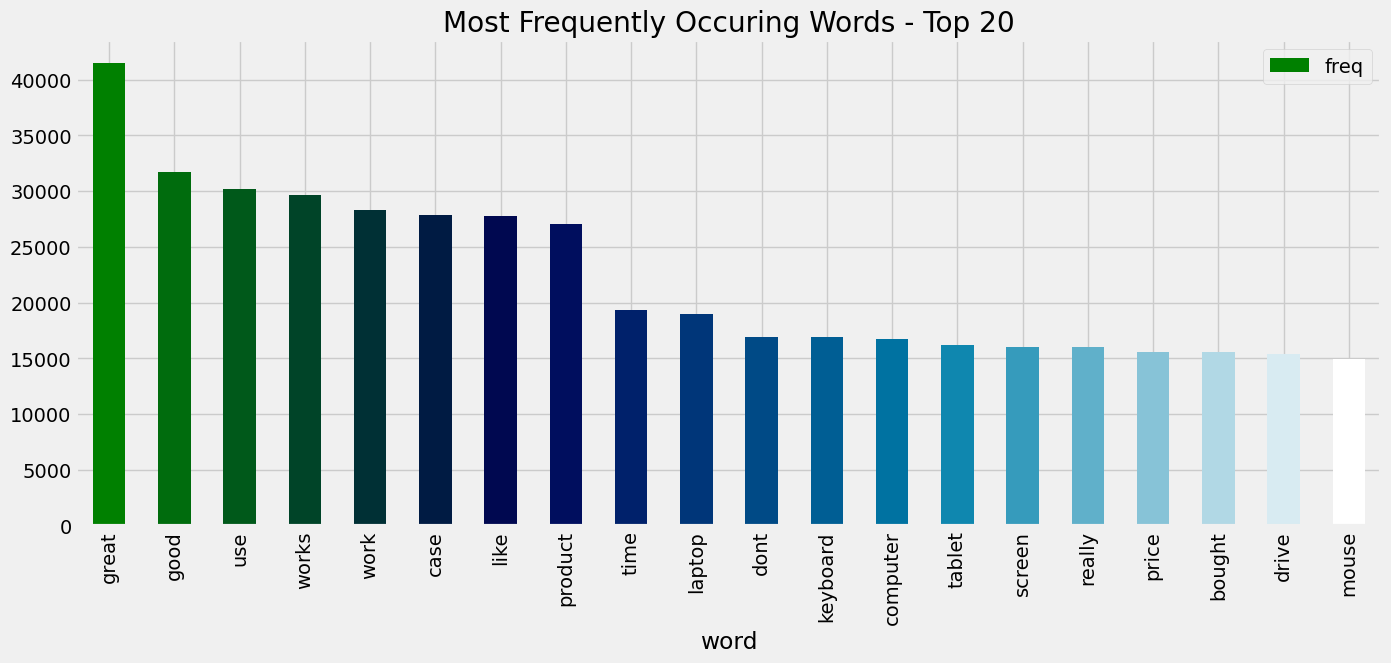

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.review_body)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()


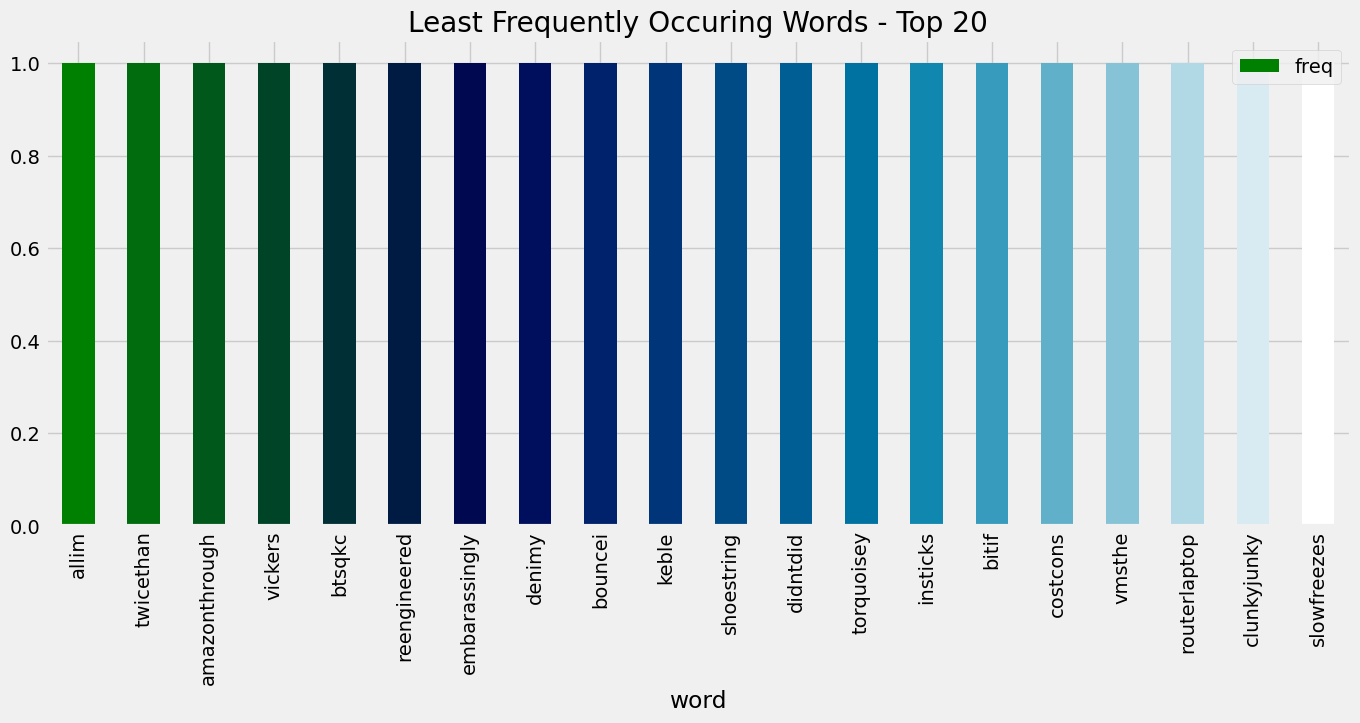

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.review_body)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

In [21]:
df['review_body'].describe()

count     200002
unique    174160
top         good
freq        1759
Name: review_body, dtype: object

In [22]:
# after reset the index dataset 
df = df.sample(frac=1).reset_index(drop=True)
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,1060724,R1ELIM7KJW4VSD,B00EB6O4N8,356004771,Corsair Obsidian Series 750D Performance Full ...,PC,5,0,1,N,Y,THE BEST FULL TOWER CASE RIGHT NOW,best full tower case right thing screams quali...,2015-08-28,1
1,US,19560168,R1BBM49W3BTERV,1400698987,203797142,"Nook HD 7"" 8GB Tablet",PC,3,0,0,N,Y,It's great worked well at first and came in br...,great worked well first came brand new packagi...,2015-07-24,0
2,US,19798591,R2866UJLICRVSF,B010PB6IH2,471486975,Phtronics Portable USB 2.1 Multimedia Mini Com...,PC,1,0,1,N,Y,Don't even waste your time,speakers pure junk flimsy thin plastic cases s...,2015-08-27,0
3,US,20221996,R2XZQ4NJT843RT,B00RTFH6V0,699299243,3PCS of HEAVY-DUTY Lightning to USB Sync Charg...,PC,1,1,7,N,Y,Best to buy an apple certified cable,bought iphone sons ipod within first weeks wou...,2015-07-10,0
4,US,14590800,R2GY4HR5PFDXQE,B0018LYCYK,44647757,Case Logic LNEO-10 Ultraportable Neoprene Note...,PC,4,0,0,N,Y,Four Stars,like,2015-08-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199997,US,22552696,R1KGYAO3FX20HB,B003VNKNF0,589324478,Transcend 8 GB Class 10 SDHC Flash Memory Card,PC,5,0,0,N,Y,Five Stars,great deal never heard company but im fan,2015-08-16,1
199998,US,16647777,RDCJWUUXSYDET,B005HMO6A6,245082817,"iPad case, iPad keyboard case, New Trent Airbe...",PC,3,0,0,N,N,Case is sturdy but a bit bulky,case sturdy but bit bulky keyboard types feels...,2015-07-21,0
199999,US,27232169,RQDHWFE69CNWI,B00YWWM98S,709291673,2015 Newest Version Dell Inspiron 5000 15.6-In...,PC,4,0,1,N,Y,Trackpad not good enough,laptop awesome except negative points trackpad...,2015-08-25,1
200000,US,23037687,R9ANIDR266N8Y,B00UZ3CYE2,483024210,Intel 1st Generation Compute Stick with Intel ...,PC,2,2,2,N,Y,Two Stars,worked great month mysteriously died,2015-07-31,0


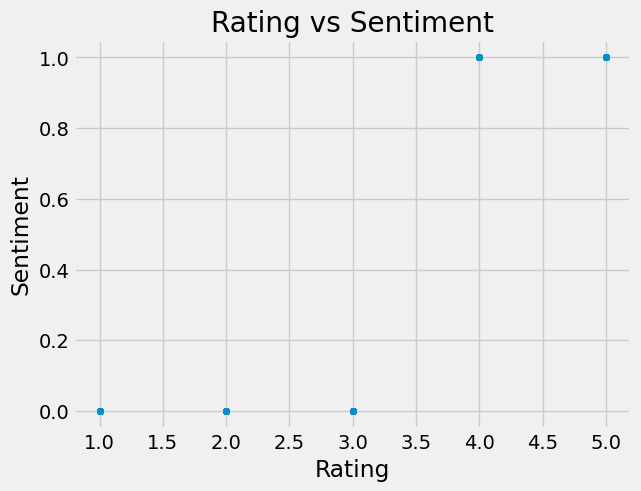

In [23]:
import matplotlib.pyplot as plt
#rating vs sentiment
df.plot(x='star_rating', y='sentiment', kind="scatter")
plt.title("Rating vs Sentiment")
plt.xlabel("Rating")
plt.ylabel("Sentiment")
plt.show()

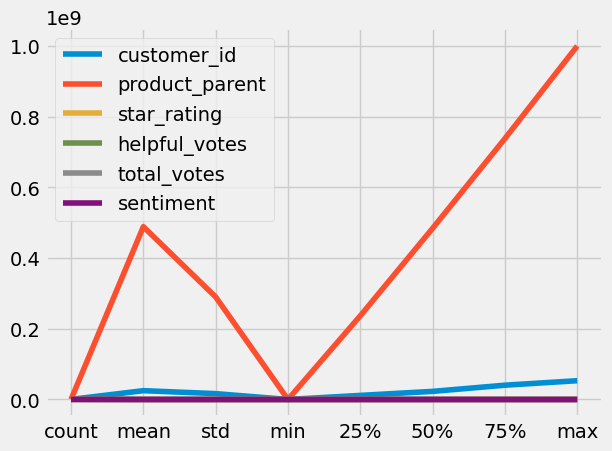

In [24]:
# Get the columns from the dataframe
columns = list(df.describe().columns)

#Create an axis
fig, ax = plt.subplots()

# Plot each column
for column in columns:
    df.describe()[column].plot(kind='line', ax=ax, label=column)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [25]:
df['review_body'].unique()

array(['best full tower case right thing screams quality big easy build well',
       'great worked well first came brand new packaging but months im problems getting stuck certain features could fault lot going nook but im not sure even though still great price good product',
       'speakers pure junk flimsy thin plastic cases simply distorted even lowest levels dont even waste time',
       ...,
       'laptop awesome except negative points trackpad not sensitive enough real pain scroll long word excel document laptop heavy pain carry around campus',
       'worked great month mysteriously died',
       'quick delivery cheap price but suction ability quite low placed th inch away successfully suck anything edit opening closure take dust collected plastic broke also found filterfixed not completely closed entrance suction motor making part dust straight suction motor spitted back air circulation hole'],
      dtype=object)

In [26]:
with sns.axes_style('white'):
    g = sns.factorplot("star_rating", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

C:\Users\manid\anaconda3\envs\tfod\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\manid\anaconda3\envs\tfod\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [27]:
df.groupby('product_title')['star_rating'].value_counts()

product_title                                                                                                                                                                            star_rating
$100 Costco Cash Card - No expiration date - Brand new from Costco ...                                                                                                                   1              1
                                                                                                                                                                                         5              1
$25 -- DIGITAL DOWNLOAD CARD New Silhouette SD Machine                                                                                                                                   5              1
'10 Guarantee SDHC card conversion adapter with Team MicroSDHC Card 32GB Class10 ECO package (32GB)                                                                                      1           

#### Sprint 2 (Task 2)

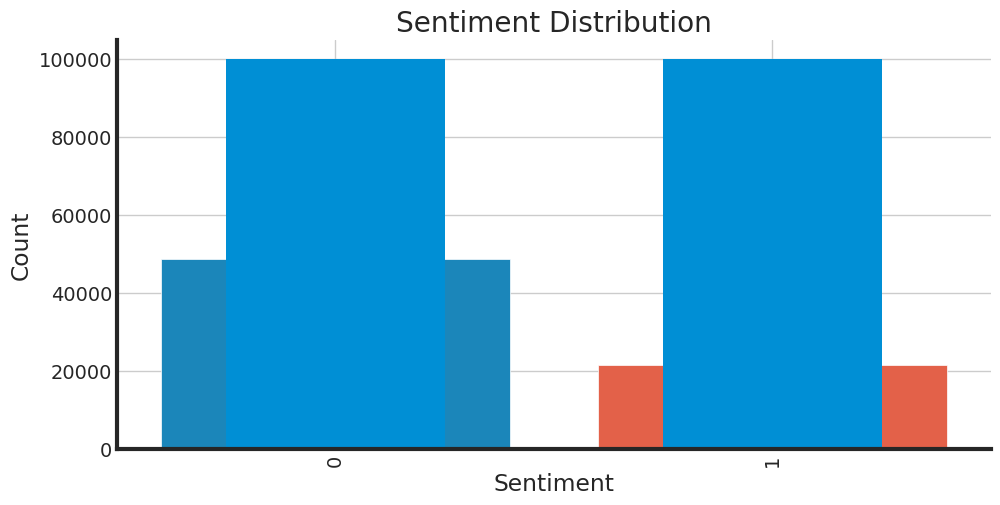

In [28]:
import matplotlib.pyplot as plt
# create a bar graph to show sentiment distribution 
sentiment_counts = df.groupby('sentiment').count()['review_body']
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

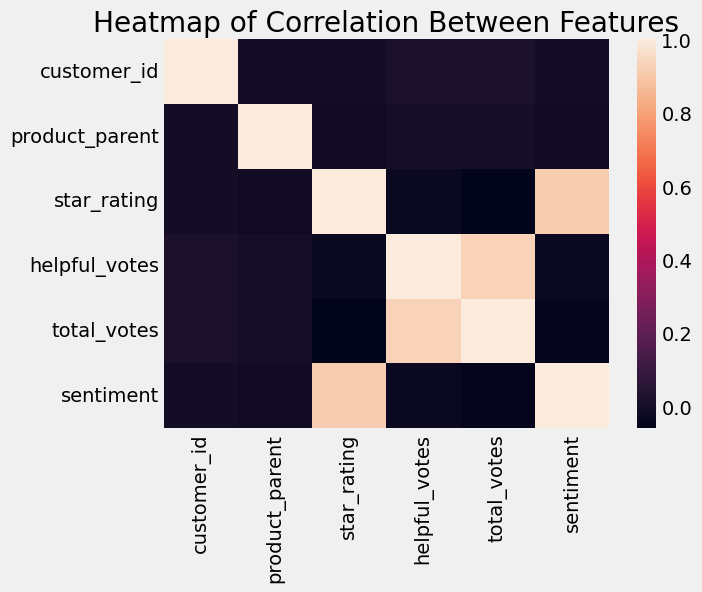

In [29]:
# correlation between the features
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Heatmap of Correlation Between Features')
plt.show()

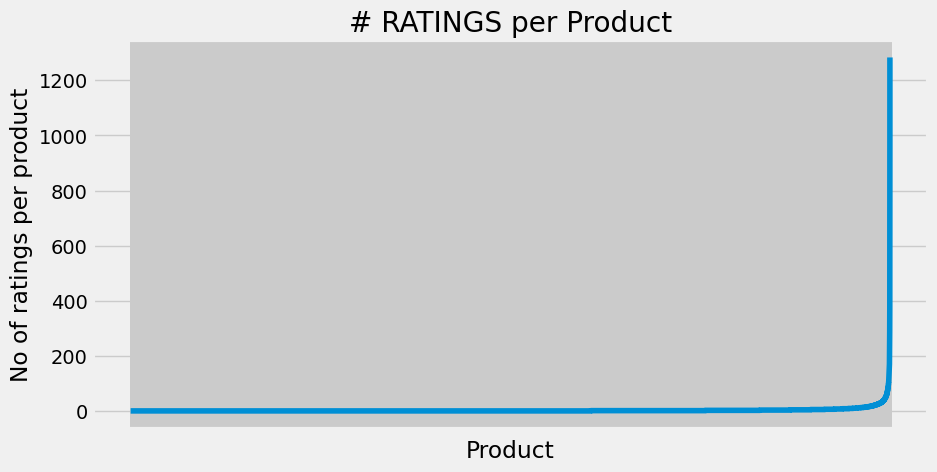

In [30]:
no_of_ratings_per_product = df.groupby(by='product_id')['star_rating'].count().sort_values(ascending=True)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [31]:
df['product_id'].value_counts()


B00OQVZDJM    1283
B00J46VVKE    1001
B00I15SB16     717
B00M55C0NS     605
B00IKPYKWG     582
              ... 
B00JQYIDBO       1
B00HYPNGB4       1
B00ZTPVAY6       1
B007ZWIEJK       1
B007PPITSS       1
Name: product_id, Length: 59920, dtype: int64

In [32]:
ratings_mean_count = pd.DataFrame(df.groupby('product_id')['star_rating'].mean())

In [33]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product_id')['star_rating'].count())

In [34]:
ratings_mean_count.hist(bins=5)

array([[<AxesSubplot:title={'center':'star_rating'}>,
        <AxesSubplot:title={'center':'rating_counts'}>]], dtype=object)

In [36]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='star_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<AxesSubplot:xlabel='product_id'>

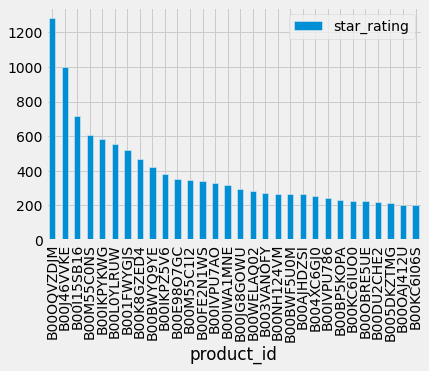

In [ ]:
popular_products = pd.DataFrame(df.groupby('product_id')['star_rating'].count())
most_popular = popular_products.sort_values('star_rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

#### Sprint 2 (Task 3)

In [40]:
!pip install wordcloud

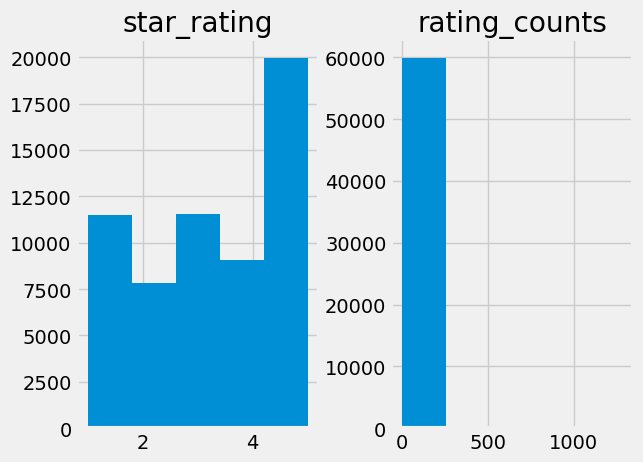

<Figure size 800x600 with 0 Axes>

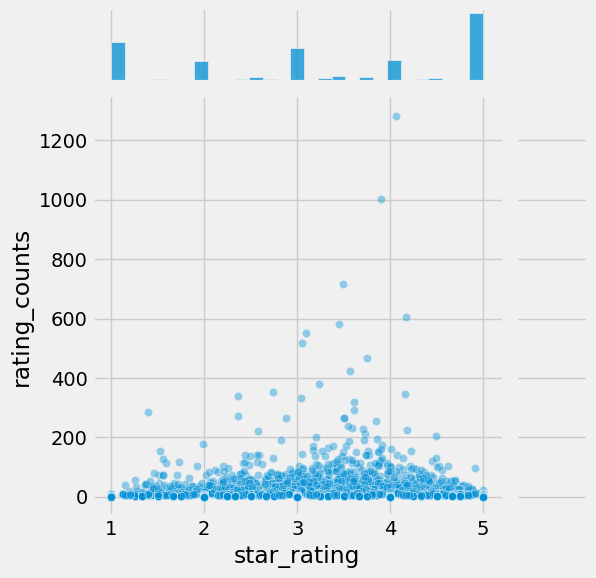

<Figure size 800x600 with 0 Axes>

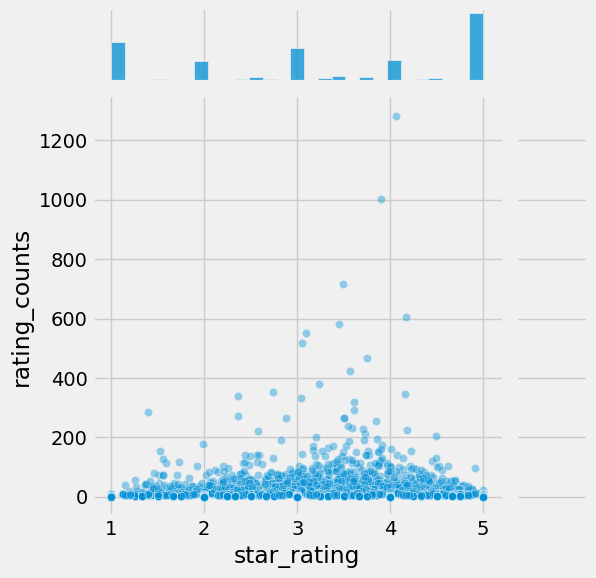

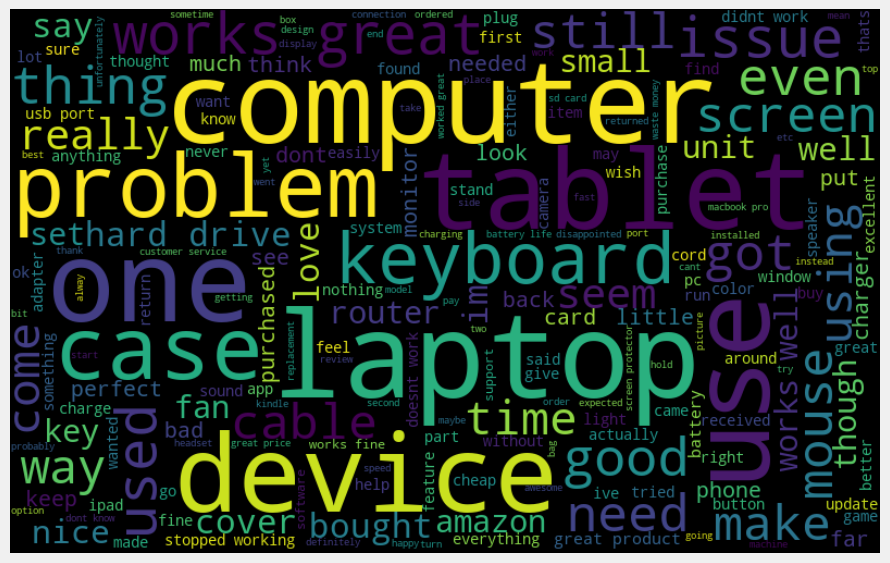

In [41]:
# Identify Common Words/Phrases
import seaborn as sns
from wordcloud import WordCloud 
# create a word cloud to show the most common words
all_words = ' '.join([text for text in df['review_body']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
from collections import Counter

pos_words = []
neg_words = []

for review in df[df['sentiment'] == 1]['review_body']:
    for word in review.split():
        pos_words.append(word.lower())

for review in df[df['sentiment'] == 0]['review_body']:
    for word in review.split():
        neg_words.append(word.lower())

pos_counts = Counter(pos_words)
neg_counts = Counter(neg_words)

print('Most Common Positive Words:')
for word, count in pos_counts.most_common(10):
    print(word, count)

print('Most Common Negative Words:')
for word, count in neg_counts.most_common(10):
    print(word, count)

Most Common Positive Words:
great 32155
but 24750
works 20354
not 20101
good 18151
one 14963
use 13123
case 13046
well 12911
like 12901
Most Common Negative Words:
not 71782
but 48633
one 25134
work 21719
would 20059
use 17037
no 16853
get 16823
like 14878
case 14803


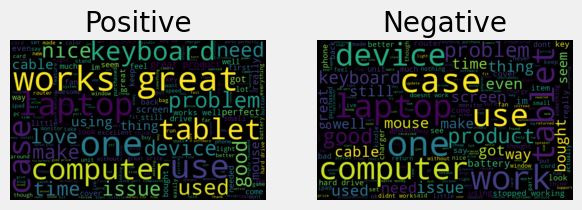

In [43]:

# create separate dataframes for each sentiment
positive_df = df[df['sentiment'] == 1]
negative_df = df[df['sentiment'] == 0]

# create word clouds for each sentiment
positive_words = ' '.join([text for text in positive_df['review_body']])
negative_words = ' '.join([text for text in negative_df['review_body']])

wordcloud_pos = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud_neg = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

# plot the word clouds
plt.figure(figsize=(10, 7))
plt.subplot(131)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.title('Positive')
plt.axis('off')

plt.subplot(132)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.title('Negative')
plt.axis('off')


plt.show()

In [44]:
df.product_title

0         Corsair Obsidian Series 750D Performance Full ...
1                                     Nook HD 7" 8GB Tablet
2         Phtronics Portable USB 2.1 Multimedia Mini Com...
3         3PCS of HEAVY-DUTY Lightning to USB Sync Charg...
4         Case Logic LNEO-10 Ultraportable Neoprene Note...
                                ...                        
199997       Transcend 8 GB Class 10 SDHC Flash Memory Card
199998    iPad case, iPad keyboard case, New Trent Airbe...
199999    2015 Newest Version Dell Inspiron 5000 15.6-In...
200000    Intel 1st Generation Compute Stick with Intel ...
200001    Computer Laptop Keyboard USB Powered Mini Vacu...
Name: product_title, Length: 200002, dtype: object

In [45]:
# no.of reviews for particular product title
product_name = 'Kindle Paperwhite'
product_reviews = df.loc[df['product_title'] == product_name]

In [46]:
product_reviews.count()

marketplace          1620
customer_id          1620
review_id            1620
product_id           1620
product_parent       1620
product_title        1620
product_category     1620
star_rating          1620
helpful_votes        1620
total_votes          1620
vine                 1620
verified_purchase    1620
review_headline      1620
review_body          1620
review_date          1620
sentiment            1620
dtype: int64

#### Sprint 3 (Task 1)

In [47]:
##converting text into vetors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=1000)
X=vectorizer.fit_transform(df['review_body']).toarray()

In [48]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33043223, 0.        ,
       0.35170149, 0.        , 0.        , 0.        , 0.     

### Sprint 3 (Task 2)

In [49]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [50]:
from textblob import TextBlob
pos_words_list=[]
neg_words_list=[]
# Create a new column for sentiment score
def senti(x):
  if TextBlob(x).sentiment.polarity>=0:
     pos_words_list.append(x)
     return 1
  else:
     neg_words_list.append(x)
     return 0

df["sentiment_score"] = df["review_body"].apply(senti)

# Print the first 10 rows of the dataset with the sentiment score
df.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,sentiment_score
0,US,1060724,R1ELIM7KJW4VSD,B00EB6O4N8,356004771,Corsair Obsidian Series 750D Performance Full ...,PC,5,0,1,N,Y,THE BEST FULL TOWER CASE RIGHT NOW,best full tower case right thing screams quali...,2015-08-28,1,1
1,US,19560168,R1BBM49W3BTERV,1400698987,203797142,"Nook HD 7"" 8GB Tablet",PC,3,0,0,N,Y,It's great worked well at first and came in br...,great worked well first came brand new packagi...,2015-07-24,0,1
2,US,19798591,R2866UJLICRVSF,B010PB6IH2,471486975,Phtronics Portable USB 2.1 Multimedia Mini Com...,PC,1,0,1,N,Y,Don't even waste your time,speakers pure junk flimsy thin plastic cases s...,2015-08-27,0,0
3,US,20221996,R2XZQ4NJT843RT,B00RTFH6V0,699299243,3PCS of HEAVY-DUTY Lightning to USB Sync Charg...,PC,1,1,7,N,Y,Best to buy an apple certified cable,bought iphone sons ipod within first weeks wou...,2015-07-10,0,1
4,US,14590800,R2GY4HR5PFDXQE,B0018LYCYK,44647757,Case Logic LNEO-10 Ultraportable Neoprene Note...,PC,4,0,0,N,Y,Four Stars,like,2015-08-23,1,1


In [51]:
df.sentiment_score.value_counts()

1    163035
0     36967
Name: sentiment_score, dtype: int64

In [52]:
Y=df['sentiment_score']
Y

0         1
1         1
2         0
3         1
4         1
         ..
199997    1
199998    1
199999    1
200000    1
200001    1
Name: sentiment_score, Length: 200002, dtype: int64

In [53]:
Y.isnull().sum()

0

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [55]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [56]:
model.score(X_test,y_test)

0.8470358827352877

### Sprint 3 (Task3)

In [57]:
predictions=model.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8470358827352877

In [59]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

### Sprint 3 (Task 4)

In [60]:
from sklearn.model_selection import GridSearchCV
mnb=MultinomialNB()
params={
    'alpha':[1.0,5.0],
    'force_alpha':[True,False],
    'fit_prior':[True,False],
    'class_prior' : [None, [.1,.9],[.2, .8]]}
gridsearchcv=GridSearchCV(estimator=mnb,
                         cv=2,
                         param_grid=params,
                         scoring='accuracy')
gridsearchcv.fit(X,Y)

ValueError: Invalid parameter force_alpha for estimator MultinomialNB(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
# best parameters for the model
gridsearchcv.best_params_

{'alpha': 5.0,
 'class_prior': [0.1, 0.9],
 'fit_prior': True,
 'force_alpha': True}

In [ ]:
# accuracy score for the best fit parameters of the model
gridsearchcv.best_score_

0.8185568144318557

In [ ]:
# After changing the parameters againing training the model
from sklearn.naive_bayes import MultinomialNB

params = {'alpha': 5.0,
 'class_prior': [0.1, 0.9],
 'fit_prior': True,
 'force_alpha': True}

model = MultinomialNB(**params)

model.fit(X_train,y_train)

MultinomialNB(alpha=5.0, class_prior=[0.1, 0.9], force_alpha=True)

In [ ]:
# prediction and  accuracy after changing the parameters
predictions=model.predict(X_test)
accuracy_score(y_test,predictions)

0.8221696305061582

#### Sprint 4 (Task 1)

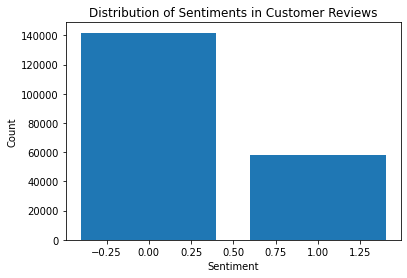

In [ ]:
sentiment_counts = df['sentiment_score'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribution of Sentiments in Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

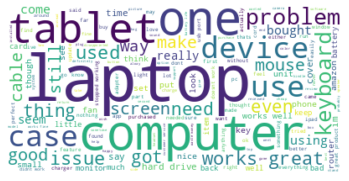

In [ ]:
from wordcloud import WordCloud 
# Create a word cloud to show the most frequently occurring words in the reviews
wordcloud = WordCloud(background_color='white').generate(' '.join(df['review_body']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

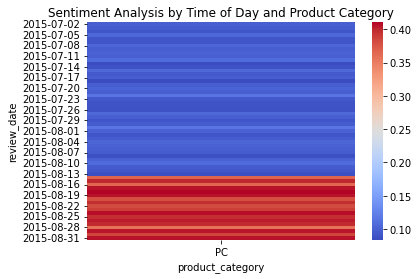

In [ ]:
# Create a heatmap to show the correlation between sentiment and other variables such as time of day or product category
heatmap_data = df.pivot_table(values='sentiment_score', index='review_date', columns='product_category')
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Sentiment Analysis by Time of Day and Product Category')
plt.show()

#### Sprint 4 (Task 2)

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='review_date', y='product_category', color='sentiment_score', size='sentiment_score', hover_name='review_body',
                 title='Sentiment Analysis by Time of Day and Product Category')
fig

#### Sprint 4 (Task 3)

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    if sentiment_score > 0:
        return 'positive'
    else:
        return 'negative'

# Apply the get_sentiment function to each review in the DataFrame
df['sentiment_is'] = df['review_body'].apply(get_sentiment)
df['sentiment_polarity'] = df['review_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the first 10 rows of the DataFrame with sentiment analysis results
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,sentiment_score,sentiment_is,sentiment_polarity
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,surprised high quality stitching sturdiness ha...,2015-08-31,1,1,positive,0.281786
1,US,30088427,RQ28TSA020Y6J,B013ALA9LA,671157305,TP-Link OnHub AC1900 Wireless Wi-Fi Router,PC,5,24,31,N,N,OnHub is a pretty no nonsense type router that...,google employee chance use device months opini...,2015-08-31,1,1,positive,0.210820
2,US,38264512,R39NJY2YJ1JFSV,B00AQMTND2,964759214,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,PC,5,0,0,N,Y,Five Stars,excellent great value job,2015-08-31,1,1,positive,0.900000
3,US,30548466,R31SR7REWNX7CF,B00KX4TORI,170101802,Kingston Digital MobileLite G4 USB 3.0 Multi-F...,PC,5,0,0,N,Y,"Good quality, works well and compact",good qualityworks well compact size,2015-08-31,1,1,positive,0.700000
4,US,49329488,R1QF6RS1PDLU18,B00TR05L9Y,778403103,"Lenovo TAB2 A10 - 10.1"" 2-in-1 Tablet (1.5Ghz,...",PC,4,1,1,N,Y,Good,not sure dont know tablet lollipop sometimes c...,2015-08-31,1,1,positive,0.462500


#### Sprint 4 (Task 4)

In [ ]:
import sqlite3
import os
if os.path.exists('customer_reviews.db'):
    os.remove('customer_reviews.db')

conn = sqlite3.connect('customer_reviews.db')

# Create a new table for the sentiment analysis results
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS sentiment_analysis
             (review_id INTEGER PRIMARY KEY, text TEXT, time_of_day TEXT,
             product_category TEXT, sentiment_score REAL, sentiment TEXT)''')

# Insert the sentiment analysis results into the SQLite database
for index, row in df.iterrows():
    review_id = index + 1
    text = row['review_body']
    time_of_day = row['review_date']
    product_category = row['product_category']
    sentiment_score = row['sentiment_score']
    sentiment_is = row['sentiment_is']
    
    c.execute("INSERT INTO sentiment_analysis  VALUES (%s, %s, %s, %s, %d, %s)",
              (review_id, text, time_of_day, product_category, sentiment_score, sentiment_is))

# Commit the changes and close the database connection
conn.commit()
conn.close()

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('customer_reviews.db')

# Create a cursor object
c = conn.cursor()

# Execute a SELECT statement to retrieve the contents of the table
c.execute('SELECT * FROM sentiment_analysis')

# Fetch all the rows from the query result
rows = c.fetchall()

print(rows)
# Close the database connection
conn.close()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Test cases

In [ ]:
df.product_id.value_counts()

B00OQVZDJM    1283
B00J46VVKE    1001
B00I15SB16     717
B00M55C0NS     605
B00IKPYKWG     582
              ... 
B004VP4RA4       1
B00OFO386A       1
B0002861NK       1
B009QEUSLW       1
B00EDLVQGO       1
Name: product_id, Length: 59920, dtype: int64

In [21]:
ids=set(df.product_id)
len(ids)

59920

In [19]:
pw=set(pos_words_list)
nw=set(neg_words_list)
ids=set(df.product_id)

In [25]:
n = input("Enter product id : ")
if n in ids:
    review = df.loc[df['product_id'] == n, 'review_body'].iloc[0]
    sentiment = df.loc[df['product_id'] == n, 'sentiment_score'].iloc[0]

    print("original review : ",review)
    print("original sentiment : ",sentiment)

    p = [token for token in review.split() if token.lower() in pw]
    k = [token for token in review.split() if token.lower() in nw]
    p.sort()
    k.sort()
    if sentiment == 1:
        print("We recommend this product to buy")
        print("Because the review of this product has positive words like:")
        print(p[:3])
    if sentiment == 0:
        print("We do not recommend this product to buy")
        print("Because the review of this product has negative words like:")
        print(k[:3])

else:
  print("The product details are not found")


Enter product id : B00EDLVQGO
original review :  worked weeks but late return
original sentiment :  0
We do not recommend this product to buy
Because the review of this product has negative words like:
['late']


#### model prediction using the review text

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=1000)
Xt=vectorizer.fit_transform(df['review_body']).toarray()

In [46]:
text=[input('write a review : ')]
print(text)
aa=vectorizer.transform(text)

write a review : good product
['good product']


In [58]:
final_sent=model.predict(aa)
print("predicted sentiment is : ",final_sent)
pp = [token for token in text[0].split() if token.lower() in pw]
kk = [token for token in text[0].split() if token.lower() in nw]
pp.sort()
kk.sort()
if final_sent== [1]:
  print("The given text review is positive")
  print("Based on the below words the review is positive")
  print(pp)
else:
  print("The given text review is negative")
  print("Based on the below words the review is negative")
  print(kk)


predicted sentiment is :  [1]
The given text review is positive
Based on the below words the review is positive
['good', 'product']
